In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import numpy as np
from emcee.autocorr import integrated_time


# MCMC tests


1. Get loads of samples from a uniform distribution and look at the empirical CDF. This is very easy to do and has saved me from a few MCMC bugs..
2. SBC



# Uniform sampling test

In [10]:
my_unif = np.genfromtxt("my_unif_samples.txt")
num_samples = len(my_unif)

# plt.plot(my_unif)
print(num_samples)
integrated_time(my_unif)

500000


array([15.52656616])

Number of samples: 500000


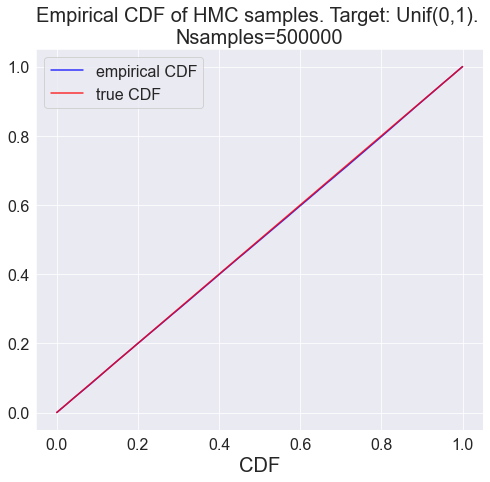

In [11]:
plt.rcParams.update({'font.size':16})
my_unif.sort()
num_samples = len(my_unif)

plt.figure(figsize=(8, 7))

plt.plot(np.linspace(0,1,num_samples), my_unif, alpha=0.8, label="empirical CDF", c='b')
plt.plot(np.linspace(0,1,num_samples), np.linspace(0,1,num_samples), alpha=0.8, label="true CDF", c='r')
plt.xlabel("Parameter", size=20)
plt.xlabel("CDF", size=20)
plt.title(f"Empirical CDF of HMC samples. Target: Unif(0,1). \nNsamples={num_samples}", size=20)
plt.legend(fontsize=16)
print(f"Number of samples: {num_samples}")

# SBC


In [12]:
rs_coeff = np.genfromtxt("rs_list_coeff_1K.txt")
rs_sigma = np.genfromtxt("rs_list_sigma_1K.txt")

In [13]:
def bar_chart(rank_stat_array, name=None):
    "plt.hist works better for floats"
    N = rank_stat_array.shape[0]
    rank_stat_vals, rank_stat_counts = np.unique(rank_stat_array, return_counts=True)
    plt.bar(rank_stat_vals, rank_stat_counts, alpha=0.8)
    plt.xlabel("rank statistic", size=17)
    plt.ylabel("Number of occurences", size=17)
    if name is not None:
        plt.title(f"Empirical distribution of rank statistics for {name}. N={N}", size=18)

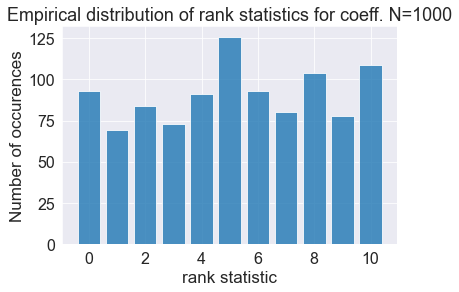

In [14]:
bar_chart(rs_coeff, 'coeff')

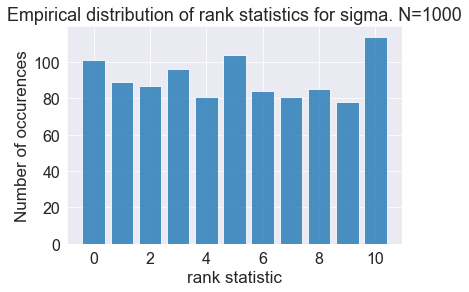

In [15]:
bar_chart(rs_sigma, 'sigma')